In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
data = pd.read_csv('USD.csv')

In [4]:
course = data.CLOSE
course.head()

0    30.7870
1    30.6963
2    30.6214
3    30.7628
4    30.7576
Name: CLOSE, dtype: float64

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(course)

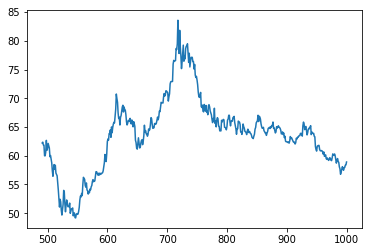

In [19]:
plt.plot(course[-510:])

In [64]:
s = course.sum()

In [66]:
new_course = [c/s for c in course]

In [67]:
new_course[:10]

[0.0006033175847461813,
 0.00060154018178595523,
 0.00060007240359719093,
 0.00060284334933672734,
 0.0006027414475132083,
 0.00060259055442838207,
 0.00060202225579721828,
 0.00060311966005050009,
 0.00060199678034133857,
 0.00060535170191565707]

In [19]:
norm_rv = sts.norm(0, 1)
uniform_rv = sts.uniform(0, 1)

In [68]:
def inverse(course, val, eps = 0.0000001):
    ecdf = ECDF(course)
    l = min(course)
    r = max(course)
    m = (l + r)/2
    while (abs(ecdf(m) - val) > eps and abs(l - r) > eps):
        if ecdf(m) > val:
            r = m
        else:
            l = m
        m = (l + r)/2
    return m

In [35]:
inverse(course[a:b], 0.9)

60.780981249999996

In [71]:
T = 50
size = 510
a = course.shape[0] - size
b = a + T
result_norm = []
result_uniform = []
for i in range(size):
    print (i, sample_uniform[i])
    result_uniform.append(inverse(course[a:b], sample_uniform[i]))
    a += 1
    b += 1

(0, 0.0269095578210371)
(1, 0.46473132933780437)
(2, 0.2871656685049232)
(3, 0.43216677696538075)
(4, 0.43971705062759991)
(5, 0.70926276201485594)
(6, 0.92125288421450235)
(7, 0.16263463486000063)
(8, 0.54242478969031049)
(9, 0.83827815530223415)
(10, 0.095103487951172738)
(11, 0.29207336224477554)
(12, 0.54415359500362392)
(13, 0.68957439042693547)
(14, 0.93738001352684053)
(15, 0.019098175963195185)
(16, 0.79914562012882628)
(17, 0.79764262165688038)
(18, 0.62532756464341699)
(19, 0.35225166844866385)
(20, 0.5705519363299173)
(21, 0.77503460612233577)
(22, 0.68898970521101921)
(23, 0.72879393165379791)
(24, 0.35311929108300255)
(25, 0.28392700330999032)
(26, 0.83587900518744529)
(27, 0.9395600548860048)
(28, 0.10845443274996902)
(29, 0.3131988421220343)
(30, 0.014935422178578017)
(31, 0.93138980135166183)
(32, 0.12799883621624242)
(33, 0.082038971314171261)
(34, 0.052523529140622749)
(35, 0.34478829047047588)
(36, 0.83359331753312815)
(37, 0.44012696250546901)
(38, 0.057587352083568

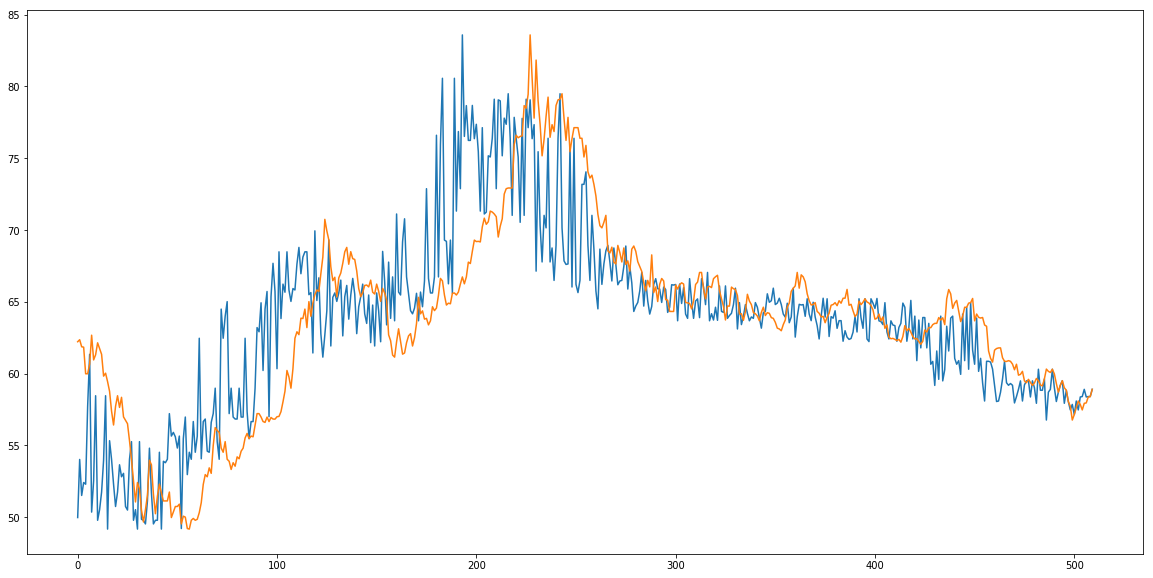

In [74]:
plt.figure(figsize=(20,10))
plt.plot(range(510), result_uniform)
plt.plot(range(510),course[-510:])

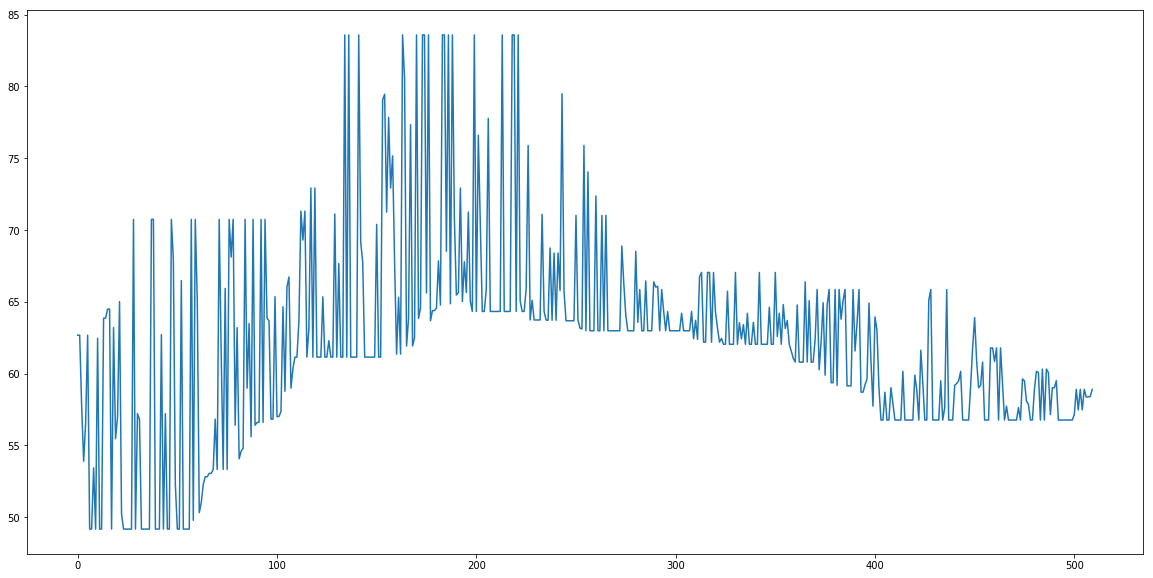

In [45]:
plt.figure(figsize=(20,10))
plt.plot(result_norm)

In [7]:
min_value = min(course)
max_value = max(course)

In [8]:
print min_value, max_value

30.6214 83.5913


In [9]:
t0 = course.shape[0] - 500
T = 500

In [91]:
course.shape

(1001,)

In [26]:
functions = []
f_0 = np.zeros(1000)
course_0 = course[t0 - 1: t0 + T -1]
for c in course_0:
    temp = int((c - min_value) / (max_value - min_value) * 1000)
    if temp == 1000:
        temp -= 1
    f_0[temp] += 1
    
f_0 = f_0 / course_0.size
functions.append(f_0)

In [27]:
f_1 = np.zeros(1000)
course_1 = course[t0: t0 +T]
for c in course_1:
    temp = int((c - min_value) / (max_value - min_value) * 1000)
    if temp == 1000:
        temp -= 1
    f_1[temp] += 1
    
f_1 = f_1 / course_1.size
functions.append(f_1)

In [ ]:
for t in range(2, 100):
    f0 = np.zeros(1000)
    for i in range(1000):
        if i == 999:
            f0[i] = functions[t-1][i]*(1 + u(i, t-2)) 
            f0[i] += diff(t-2)*(2*functions[t-1][i-1] - functions[t-1][i-2]) /2
            f0[i] /= (1 + diff(t-2)/2)
        else:   
            f0[i] = functions[t-1][i]*(1 + u(i, t-2)) 
            f0[i] += functions[t-1][i+1]*u(i+1, t-2) 
            f0[i] += diff(t-2)*(2*functions[t-1][i-1] - functions[t-1][i-2]) /2
            f0[i] /= (1 + diff(t-2)/2)
        #if f0[i] < 0:
        #    f0[i] = 0
        f0[i] = abs(f0[i])
    f0 = f0 / sum(f0)
    functions.append(f0)
    print t

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


In [20]:
samples = uniform_rv.rvs(T)

In [21]:
def inversion(t, val, eps = 0.0001):
    l = 0
    r = 999
    m = (l + r)/2
    temp = F(m, t)
    while abs(temp - val) > eps and abs(l - r) > 1:
        if temp > val:
            r = m
        else:
            l =  m
        m = (l + r)/2
        temp = F(m, t)
    return get_value(m)

In [24]:
result = []
for i in range(len(functions)):
    print i, samples[i]
    result.append(inversion(i, samples[i]))

0 0.593553736832
1 0.583859185785
2 0.589580221751
3 0.0526133868693
4 0.0442030552414
5 0.00477432435391
6 0.133526493431
7 0.838571936626
8 0.435029716218
9 0.407151665447
10 0.52204638754
11 0.324784105409
12 0.128766289135
13 0.181243544171
14 0.116155358689
15 0.985663149606
16 0.523826721754
17 0.237100453129
18 0.953406075472
19 0.479581120331


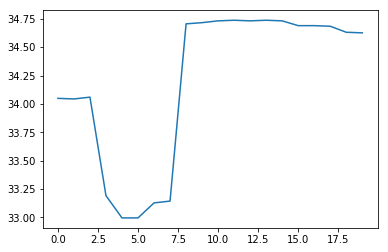

In [25]:
#plt.figure(figsize=(20,10))
plt.plot(result)

In [22]:
def get_value(i):
    return min_value + (max_value - min_value) * i / 10000

In [14]:
def diff(t, T=500):
    s = 0
    for k in range(t -T, t):
        s += (course[k + t0] - course[k+1 + t0])**2
    return abs(s/T - 1/(T)**2 *(course[t + t0] - course[t-T + t0])**2)

In [15]:
def F(i, t, T=510):
    s = 0
    for k in range(1, i+1):
        s += functions[t][k]
    return s

In [16]:
def u(i, t, T=510):
    if (i==0):
        return 0
    if i >= 999:
        return 0
    if functions[t][i+1] ==0:
        return 0
    return (F(i - 1, t) - F(i, t + 1))/functions[t][i+1]